In [1]:
import os
import numpy as np
import pandas as pd
from random import sample
import statistics as stats
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

In [64]:
df= pd.read_csv('features.csv')
print('The data dimension is:',df.shape)

The data dimension is: (25890, 16)


In [65]:
df.sample(5)

,Min_hr,Max_hr,Mean_hr,Men_acc_sqrt,Min_acc_x,Max_acc_x,Mean_acc_x,Min_acc_y,Max_acc_y,Mean_acc_y,Min_acc_z,Max_acc_z,Mean_acc_z,Binary label,Multiple label,ID
7702,54.0,57.0,54.86,1.00,-0.28,-0.27,-0.27,0.90,0.91,0.91,-0.33,-0.32,-0.32,0.0,5.0,8.0
11071,84.0,86.0,85.20,0.99,-0.25,-0.24,-0.24,-0.28,-0.26,-0.27,-0.93,-0.92,-0.92,1.0,3.0,13.0
10353,82.0,87.0,84.33,1.00,-0.27,-0.26,-0.26,-0.22,-0.21,-0.22,0.93,0.94,0.94,1.0,2.0,12.0
20251,61.0,68.0,62.60,1.00,-0.35,-0.34,-0.35,0.10,0.10,0.10,0.93,0.93,0.93,1.0,2.0,24.0
13906,56.0,58.0,57.33,1.00,-0.53,-0.52,-0.53,-0.07,-0.06,-0.06,0.85,0.86,0.85,1.0,2.0,16.0


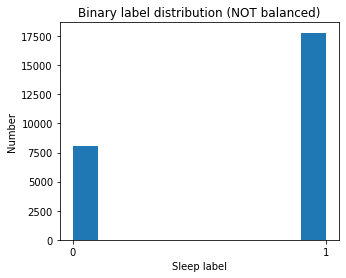

In [66]:
#Binary label
plt.figure(figsize=(5, 4))
plt.title('Binary label distribution (NOT balanced)')
plt.xlabel("Sleep label")
plt.xticks([0,1])
plt.ylabel("Number")
plt.hist(df['Binary label'])
plt.savefig('Image/Binary_NOT.png')
plt.show()

In [67]:
labels_bin=df['Binary label'] # 0 (0,-1,5) and 1 (1,2,3,4)

lab_0_bin = []
idx_0_bin = []
list_idx_0_bin = []

for l in labels_bin:
    if l==0:
        idx_0_bin.append(True)
    else:
        idx_0_bin.append(False)
list_idx_0_bin.append(df[idx_0_bin])
lab_1_bin = []
idx_1_bin = []
list_idx_1_bin = []

for l in labels_bin:
    if l==1:
        idx_1_bin.append(True)
    else:
        idx_1_bin.append(False)
list_idx_1_bin.append(df[idx_1_bin])

df0_bin = pd.DataFrame()  
for i in range(len(list_idx_0_bin)):
    df0_bin=df0_bin.append(list_idx_0_bin[i])
df1_bin = pd.DataFrame()  
for i in range(len(list_idx_1_bin)):
    df1_bin=df1_bin.append(list_idx_1_bin[i])

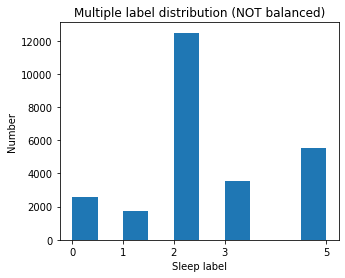

In [68]:
#Multiple label
plt.figure(figsize=(5, 4))
plt.title('Multiple label distribution (NOT balanced)')
plt.xlabel("Sleep label")
plt.xticks([0,1,2,3,5])
plt.ylabel("Number")
plt.hist(df['Multiple label'])
plt.savefig('Image/Multiple_NOT.png')
plt.show()

In [69]:
labels_multi=df['Multiple label'] #0 (-1,0), 1, 2, 3 (3,4), 5

lab_0_multi = []
idx_0_multi = []
list_idx_0_multi = []

for l in labels_multi:
    if l==0:
        idx_0_multi.append(True)
    else:
        idx_0_multi.append(False)
list_idx_0_multi.append(df[idx_0_multi])
lab_1_multi = []
idx_1_multi = []
list_idx_1_multi = []

for l in labels_multi:
    if l==1:
        idx_1_multi.append(True)
    else:
        idx_1_multi.append(False)
list_idx_1_multi.append(df[idx_1_multi])
lab_2_multi = []
idx_2_multi = []
list_idx_2_multi = []

for l in labels_multi:
    if l==2:
        idx_2_multi.append(True)
    else:
        idx_2_multi.append(False)
list_idx_2_multi.append(df[idx_2_multi])
lab_3_multi = []
idx_3_multi = []
list_idx_3_multi = []

for l in labels_multi:
    if l==3:
        idx_3_multi.append(True)
    else:
        idx_3_multi.append(False)
list_idx_3_multi.append(df[idx_3_multi])
lab_5_multi = []
idx_5_multi = []
list_idx_5_multi = []

for l in labels_multi:
    if l==5:
        idx_5_multi.append(True)
    else:
        idx_5_multi.append(False)
list_idx_5_multi.append(df[idx_5_multi])


df0_multi = pd.DataFrame()  
for i in range(len(list_idx_0_multi)):
    df0_multi=df0_multi.append(list_idx_0_multi[i])
df1_multi = pd.DataFrame()  
for i in range(len(list_idx_1_multi)):
    df1_multi=df1_multi.append(list_idx_1_multi[i])
df2_multi = pd.DataFrame()  
for i in range(len(list_idx_2_multi)):
    df2_multi=df2_multi.append(list_idx_2_multi[i])
df3_multi = pd.DataFrame()  
for i in range(len(list_idx_3_multi)):
    df3_multi=df3_multi.append(list_idx_3_multi[i])
df5_multi = pd.DataFrame()  
for i in range(len(list_idx_5_multi)):
    df5_multi=df5_multi.append(list_idx_5_multi[i])

In [70]:
n_lab_binarias=[df0_bin['Binary label'].value_counts()[0],df1_bin['Binary label'].value_counts()[1]]
n_lab_multiclase=[df0_multi['Multiple label'].value_counts()[0],df1_multi['Multiple label'].value_counts()[1],
      df2_multi['Multiple label'].value_counts()[2],df3_multi['Multiple label'].value_counts()[3],
      df5_multi['Multiple label'].value_counts()[5]]
n_lab=min([min(n_lab_binarias),min(n_lab_multiclase)])
print('\n','Binary:',n_lab_binarias,'\n','Multiple:',n_lab_multiclase,'\n','Minimum:',n_lab,'\n')


 Binary: [8098, 17792] 
 Multiple: [2554, 1761, 12486, 3545, 5544] 
 Minimum: 1761 



We created two different data frames: one with balanced multi-type label data (df_multi_balanced), and the other with balanced binary label data (df_bin_balanced). All classes (binary and multi-class) have been balanced to the minimum number of tags for both types.

In [71]:
n_lab_bin=600 # limit the number of samples per category
df_bin_balanced = pd.DataFrame()
df_bin_balanced=df_bin_balanced.append(df0_bin.sample(n_lab_bin)).append(df1_bin.sample(n_lab_bin))
print('The data dimension(Binary) is:',df_bin_balanced.shape)

n_lab_multi=200
df_multi_balanced = pd.DataFrame()
df_multi_balanced=df_multi_balanced.append(df0_multi.sample(n_lab_multi)).append(df1_multi.sample(n_lab_multi)).append(df2_multi.sample(n_lab_multi)).append(df3_multi.sample(n_lab_multi)).append(df5_multi.sample(n_lab_multi))
print('The data dimension(Multiple) is:',df_multi_balanced.shape)

The data dimension(Binary) is: (1200, 16)
The data dimension(Multiple) is: (1000, 16)


Binary label
Number of different values for binary labels: 2 

Number of times each binary label value is taken:
0.0    600
1.0    600
Name: Binary label, dtype: int64 



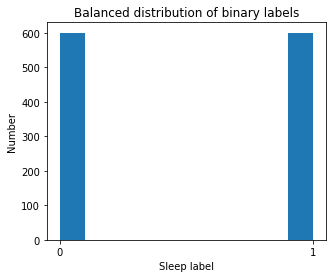

Multiple label
Number of different values for multiple labels: 5 

Number of times each multiple label value is taken:
0.0    200
3.0    200
2.0    200
5.0    200
1.0    200
Name: Multiple label, dtype: int64 



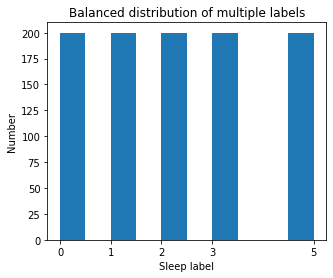

In [72]:
print('\x1b[1;30m'+'Binary label'+'\x1b[0m')
print('Number of different values for binary labels:',df_bin_balanced['Binary label'].nunique(),'\n')
print('Number of times each binary label value is taken:')
print(df_bin_balanced['Binary label'].value_counts(),'\n')
plt.figure(figsize=(5, 4))
plt.title('Balanced distribution of binary labels')
plt.xlabel("Sleep label")
plt.ylabel("Number")
plt.xticks([0,1])
plt.hist(df_bin_balanced['Binary label'])
plt.savefig('Image/Binary.png')
plt.show()

print('\x1b[1;30m'+'Multiple label'+'\x1b[0m')
print('Number of different values for multiple labels:',df_multi_balanced['Multiple label'].nunique(),'\n')
print('Number of times each multiple label value is taken:')
print(df_multi_balanced['Multiple label'].value_counts(),'\n')
plt.figure(figsize=(5, 4))
plt.title('Balanced distribution of multiple labels')
plt.xlabel("Sleep label")
plt.ylabel("Number")
plt.xticks([-1,0,1,2,3,5])
plt.hist(df_multi_balanced['Multiple label'])
plt.savefig('Image/Multiple.png')
plt.show()

In [73]:
print('The percentage of data available after balancing the binary labels is:',"{0:.2f}".format((df_bin_balanced.shape[0]*100)/df.shape[0]),'%')
print('The percentage of data available after balancing the multiple labels is:',"{0:.2f}".format((df_multi_balanced.shape[0]*100)/df.shape[0]),'%')

The percentage of data available after balancing the binary labels is: 4.63 %
The percentage of data available after balancing the multiple labels is: 3.86 %


In [74]:
#Train and Test subsets
lista = list(range(31)) # List of 31 numbers
sub_train = sample(lista,k=24) # 24 train subjects
sub_test = [el for el in lista if el not in sub_train] #7 for test

print(len(sub_train),'train subjects:',sub_train)
print(len(sub_test),'test subjects:',sub_test)

24 train subjects: [17, 2, 8, 0, 9, 26, 14, 15, 21, 29, 27, 6, 18, 12, 13, 28, 25, 22, 7, 30, 24, 1, 3, 11]
7 test subjects: [4, 5, 10, 16, 19, 20, 23]


In [75]:
#Binary label
train_matr = []
test_matr = []
id = df_bin_balanced['ID']

for i in sub_train:    
    idx = []
    for s in id:
        if s==i:
            idx.append(True)
        else:
            idx.append(False)
    train_matr.append(df_bin_balanced[idx])

for i in sub_test:    
    idx = []
    for s in id:
        if s==i:
            idx.append(True)
        else:
            idx.append(False)
    test_matr.append(df_bin_balanced[idx])

In [76]:
Train_bin_balanced = pd.DataFrame()
for i in range(len(train_matr)):
    Train_bin_balanced=Train_bin_balanced.append(train_matr[i])

Test_bin_balanced = pd.DataFrame()  
for i in range(len(test_matr)):
    Test_bin_balanced=Test_bin_balanced.append(test_matr[i])

In [77]:
Train_bin_balanced.to_csv('Train_binary.csv', header=True, index=False)
Test_bin_balanced.to_csv('Test_binary.csv', header=True, index=False)

In [78]:
#Multiple label
train_matr = []
test_matr = []
id = df_multi_balanced['ID']

for i in sub_train:    
    idx = []
    for s in id:
        if s==i:
            idx.append(True)
        else:
            idx.append(False)
    train_matr.append(df_multi_balanced[idx])

for i in sub_test:    
    idx = []
    for s in id:
        if s==i:
            idx.append(True)
        else:
            idx.append(False)
    test_matr.append(df_multi_balanced[idx])

In [79]:
Train_multi_balanced = pd.DataFrame()
for i in range(len(train_matr)):
    Train_multi_balanced=Train_multi_balanced.append(train_matr[i])

Test_multi_balanced = pd.DataFrame()  
for i in range(len(test_matr)):
    Test_multi_balanced=Test_multi_balanced.append(test_matr[i])

In [80]:
Train_multi_balanced.to_csv('Train_multiclass.csv', header=True, index=False)
Test_multi_balanced.to_csv('Test_multiclass.csv', header=True, index=False)

In [81]:
#Data normalization
#Binary label
Train_tt_bin_balanced=Train_bin_balanced.copy()
Test_tt_bin_balanced=Test_bin_balanced.copy()

In [82]:
X_train=Train_tt_bin_balanced.drop(['Binary label','Multiple label','ID'], axis = 1) 
columns_name=list(X_train.columns)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)
Train_bin_transformed=pd.DataFrame(X_train_transformed, columns=columns_name)
Train_bin_transformed['Multiple label'], Train_bin_transformed['Binary label'], Train_bin_transformed['ID'] = [Train_bin_balanced['Multiple label'].values, Train_bin_balanced['Binary label'].values, Train_bin_balanced['ID'].values]

X_test=Test_tt_bin_balanced.drop(['Binary label','Multiple label','ID'], axis = 1) 
scaler = preprocessing.StandardScaler().fit(X_train)
X_test_transformed = scaler.transform(X_test)
Test_bin_transformed=pd.DataFrame(X_test_transformed, columns=columns_name)
Test_bin_transformed['Multiple label'], Test_bin_transformed['Binary label'], Test_bin_transformed['ID'] = [Test_bin_balanced['Multiple label'].values, Test_bin_balanced['Binary label'].values, Test_bin_balanced['ID'].values]

In [83]:
Train_bin_transformed.to_csv('Train_binary_transformed.csv', header=True, index=False)
Test_bin_transformed.to_csv('Test_binary_transformed.csv', header=True, index=False)

In [84]:
#Multiple label
Train_tt_multi_balanced=Train_multi_balanced.copy()
Test_tt_multi_balanced=Test_multi_balanced.copy()

In [85]:
X_train=Train_tt_multi_balanced.drop(['Binary label','Multiple label','ID'], axis = 1) 
columns_name=list(X_train.columns)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)
Train_multi_transformed=pd.DataFrame(X_train_transformed, columns=columns_name)
Train_multi_transformed['Multiple label'], Train_multi_transformed['Binary label'], Train_multi_transformed['ID'] = [Train_multi_balanced['Multiple label'].values, Train_multi_balanced['Binary label'].values, Train_multi_balanced['ID'].values]

X_test=Test_tt_multi_balanced.drop(['Binary label','Multiple label','ID'], axis = 1) 
scaler = preprocessing.StandardScaler().fit(X_train)
X_test_transformed = scaler.transform(X_test)
Test_multi_transformed=pd.DataFrame(X_test_transformed, columns=columns_name)
Test_multi_transformed['Multiple label'], Test_multi_transformed['Binary label'], Test_multi_transformed['ID'] = [Test_multi_balanced['Multiple label'].values, Test_multi_balanced['Binary label'].values, Test_multi_balanced['ID'].values]

In [86]:
Train_multi_transformed.to_csv('Train_multiclass_transformed.csv', header=True, index=False)
Test_multi_transformed.to_csv('Test_multiclass_transformed.csv', header=True, index=False)

In [87]:
#Binary label
#visualization
#Training and testing subsets
print('The dimensions of the matrix with binary labels is:',df_bin_balanced.shape)
print('The dimensions of the TRAIN matrix with binary labels is:',Train_bin_balanced.shape)
print('The dimensions of the TEST matrix with binary labels is:',Test_bin_balanced.shape)

The dimensions of the matrix with binary labels is: (1200, 16)
The dimensions of the TRAIN matrix with binary labels is: (931, 16)
The dimensions of the TEST matrix with binary labels is: (269, 16)


TRAIN
Number of different values for binary labels in TRAIN: 2 

Number of times each binary label value is taken in TRAIN:
1.0    466
0.0    465
Name: Binary label, dtype: int64 



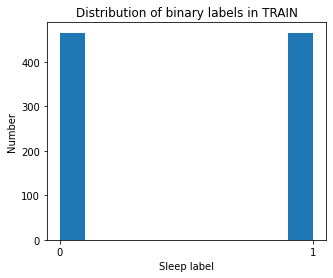

TEST
Number of different values for binary labels in TEST: 2 

Number of times each binary label value is taken in TEST:
0.0    135
1.0    134
Name: Binary label, dtype: int64 



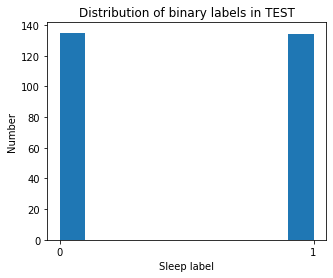

In [88]:
print('\x1b[1;30m'+'TRAIN'+'\x1b[0m')
print('Number of different values for binary labels in TRAIN:',Train_bin_balanced['Binary label'].nunique(),'\n')
print('Number of times each binary label value is taken in TRAIN:')
print(Train_bin_balanced['Binary label'].value_counts(),'\n')
plt.figure(figsize=(5, 4))
plt.title('Distribution of binary labels in TRAIN')
plt.xlabel("Sleep label")
plt.ylabel("Number")
plt.xticks([0,1])
plt.hist(Train_bin_balanced['Binary label'])
plt.savefig('Image/bl_train.png')
plt.show()

print('\x1b[1;30m'+'TEST'+'\x1b[0m')
print('Number of different values for binary labels in TEST:',Test_bin_balanced['Binary label'].nunique(),'\n')
print('Number of times each binary label value is taken in TEST:')
print(Test_bin_balanced['Binary label'].value_counts(),'\n')
plt.figure(figsize=(5, 4))
plt.title('Distribution of binary labels in TEST')
plt.xlabel("Sleep label")
plt.ylabel("Number")
plt.xticks([0,1])
plt.hist(Test_bin_balanced['Binary label'])
plt.savefig('Image/bl_test.png')
plt.show()

In [89]:
#normalization
print('The dimensions of the unnormalized TRAIN matrix is:',Train_tt_bin_balanced.shape)
print('The dimensions of the unnormalized TEST matrix is:',Test_tt_bin_balanced.shape)
print('\n')
print('The dimensions of the TRAIN matrix with normalized binary labels is:',Train_bin_transformed.shape)
print('The dimensions of the TEST matrix with normalized binary labels is:',Test_bin_transformed.shape)

The dimensions of the unnormalized TRAIN matrix is: (931, 16)
The dimensions of the unnormalized TEST matrix is: (269, 16)


The dimensions of the TRAIN matrix with normalized binary labels is: (931, 16)
The dimensions of the TEST matrix with normalized binary labels is: (269, 16)


TRAIN
Number of different values for binary labels in TRAIN: 2 

Number of times each binary label value is taken in TRAIN:
1.0    466
0.0    465
Name: Binary label, dtype: int64 



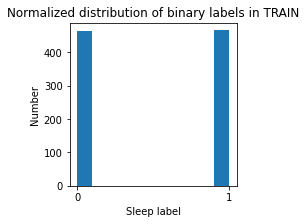

TEST
Number of different values for binary labels in TEST: 2 

Number of times each binary label value is taken in TEST:
0.0    135
1.0    134
Name: Binary label, dtype: int64 



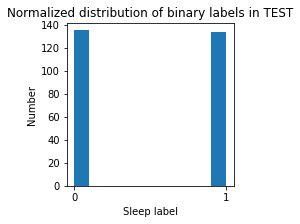

In [90]:
print('\x1b[1;30m'+'TRAIN'+'\x1b[0m')
print('Number of different values for binary labels in TRAIN:',Train_bin_balanced['Binary label'].nunique(),'\n')
print('Number of times each binary label value is taken in TRAIN:')
print(Train_bin_balanced['Binary label'].value_counts(),'\n')
plt.figure(figsize=(3, 3))
plt.title('Normalized distribution of binary labels in TRAIN')
plt.xlabel("Sleep label")
plt.ylabel("Number")
plt.xticks([0,1])
plt.hist(Train_bin_balanced['Binary label'])
plt.show()

print('\x1b[1;30m'+'TEST'+'\x1b[0m')
print('Number of different values for binary labels in TEST:',Test_bin_balanced['Binary label'].nunique(),'\n')
print('Number of times each binary label value is taken in TEST:')
print(Test_bin_balanced['Binary label'].value_counts(),'\n')
plt.figure(figsize=(3, 3))
plt.title('Normalized distribution of binary labels in TEST')
plt.xlabel("Sleep label")
plt.ylabel("Number")
plt.xticks([0,1])
plt.hist(Test_bin_balanced['Binary label'])
plt.show()

In [91]:
#Multiple label
print('The dimensions of the matrix with multiple labels is:',df_multi_balanced.shape)
print('The dimensions of the TRAIN matrix with multiple labels is:',Train_multi_balanced.shape)
print('The dimensions of the Test matrix with multiclass labels is:',Test_multi_balanced.shape)

The dimensions of the matrix with multiple labels is: (1000, 16)
The dimensions of the TRAIN matrix with multiple labels is: (782, 16)
The dimensions of the Test matrix with multiclass labels is: (218, 16)


TRAIN
Number of different values for multiple labels in TRAIN: 5 

Number of times each multple labels value is taken in TRAIN:
3.0    167
0.0    165
1.0    154
5.0    150
2.0    146
Name: Multiple label, dtype: int64 



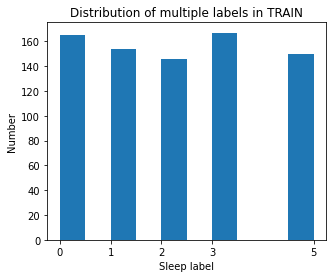

TEST
Number of different values for multiple labels in TEST: 5 

Number of times each multple labels value is taken in TEST:
2.0    54
5.0    50
1.0    46
0.0    35
3.0    33
Name: Multiple label, dtype: int64 



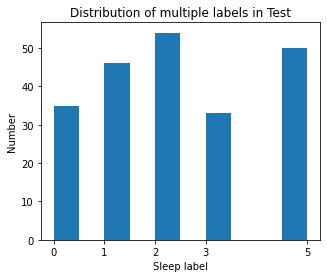

In [92]:
print('\x1b[1;30m'+'TRAIN'+'\x1b[0m')
print('Number of different values for multiple labels in TRAIN:',Train_multi_balanced['Multiple label'].nunique(),'\n')
print('Number of times each multple labels value is taken in TRAIN:')
print(Train_multi_balanced['Multiple label'].value_counts(),'\n')
plt.figure(figsize=(5, 4))
plt.title('Distribution of multiple labels in TRAIN')
plt.xlabel("Sleep label")
plt.ylabel("Number")
plt.xticks([0,1,2,3,5])
plt.hist(Train_multi_balanced['Multiple label'])
plt.savefig('Image/ml_train.png')
plt.show()

print('\x1b[1;30m'+'TEST'+'\x1b[0m')
print('Number of different values for multiple labels in TEST:',Test_multi_balanced['Multiple label'].nunique(),'\n')
print('Number of times each multple labels value is taken in TEST:')
print(Test_multi_balanced['Multiple label'].value_counts(),'\n')
plt.figure(figsize=(5, 4))
plt.title('Distribution of multiple labels in Test')
plt.xlabel("Sleep label")
plt.ylabel("Number")
plt.xticks([0,1,2,3,5])
plt.hist(Test_multi_balanced['Multiple label'])
plt.savefig('Image/ml_test.png')
plt.show()

In [93]:
print('The dimensions of the unnormalized TRAIN matrix is:',Train_tt_multi_balanced.shape)
print('The dimensions of the unnormalized TEST matrix is:',Test_tt_multi_balanced.shape)
print('\n')
print('The dimensions of the TRAIN matrix with normalized multiple label is:',Train_multi_transformed.shape)
print('The dimensions of the TEST matrix with normalized multiple label is:',Test_multi_transformed.shape)

The dimensions of the unnormalized TRAIN matrix is: (782, 16)
The dimensions of the unnormalized TEST matrix is: (218, 16)


The dimensions of the TRAIN matrix with normalized multiple label is: (782, 16)
The dimensions of the TEST matrix with normalized multiple label is: (218, 16)


TRAIN
Number of different values for multiple labels in TRAIN: 5 

Number of times each multple labels value is taken in TRAIN:
3.0    167
0.0    165
1.0    154
5.0    150
2.0    146
Name: Multiple label, dtype: int64 



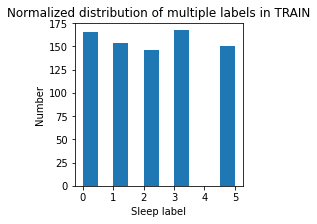

TEST
Number of different values for multiple labels in TEST: 5 

Number of times each multple labels value is taken in TEST:
2.0    54
5.0    50
1.0    46
0.0    35
3.0    33
Name: Multiple label, dtype: int64 



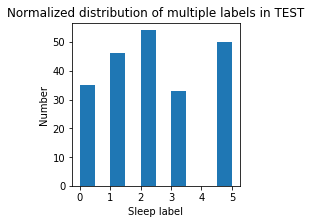

In [94]:
print('\x1b[1;30m'+'TRAIN'+'\x1b[0m')
print('Number of different values for multiple labels in TRAIN:',Train_multi_transformed['Multiple label'].nunique(),'\n')
print('Number of times each multple labels value is taken in TRAIN:')
print(Train_multi_transformed['Multiple label'].value_counts(),'\n')
plt.figure(figsize=(3, 3))
plt.title('Normalized distribution of multiple labels in TRAIN')
plt.xlabel("Sleep label")
plt.ylabel("Number")
plt.xticks([-1,0,1,2,3,4,5])
plt.hist(Train_multi_transformed['Multiple label'])
plt.show()

print('\x1b[1;30m'+'TEST'+'\x1b[0m')
print('Number of different values for multiple labels in TEST:',Test_multi_transformed['Multiple label'].nunique(),'\n')
print('Number of times each multple labels value is taken in TEST:')
print(Test_multi_transformed['Multiple label'].value_counts(),'\n')
plt.figure(figsize=(3, 3))
plt.title('Normalized distribution of multiple labels in TEST')
plt.xlabel("Sleep label")
plt.ylabel("Number")
plt.xticks([-1,0,1,2,3,4,5])
plt.hist(Test_multi_transformed['Multiple label'])
plt.show()